In [ ]:
from google.colab import files
uploaded=files.upload()

Saving medquad.csv.zip to medquad.csv.zip


In [ ]:
import pandas as pd
df=pd.read_csv("medquad.csv.zip")
df.head()

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma


DATA PREPARATION

In [ ]:
import pandas as pd
import re
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
df = pd.read_csv("medquad.csv.zip")

# Step 1: Clean text
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', str(text))
    text = re.sub(r'[^a-zA-Z\\s]', '', text)
    return text.lower()

df['cleaned_question'] = df['question'].apply(clean_text)

# Step 2: Simple lemmatization
def simple_lemmatizer(text):
    tokens = text.split()
    lemmatized = [word.rstrip('s') for word in tokens if len(word) > 2]
    return ' '.join(lemmatized)

df['lemmatized_question'] = df['cleaned_question'].apply(simple_lemmatizer)

# Step 3: Balance dataset by sampling (max 500 per class)
sampled_df = df.groupby('focus_area').apply(lambda x: x.sample(min(len(x), 500), random_state=42)).reset_index(drop=True)

# Encode labels
label_encoder = LabelEncoder()
sampled_df['encoded_label'] = label_encoder.fit_transform(sampled_df['focus_area'])

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=500)
X_tfidf = tfidf.fit_transform(sampled_df['lemmatized_question'])

# Save processed sample
sampled_df[['question', 'lemmatized_question', 'focus_area', 'encoded_label']].to_csv("processed_sample.csv", index=False)


<ipython-input-12-9c791123e747>:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('focus_area').apply(lambda x: x.sample(min(len(x), 500), random_state=42)).reset_index(drop=True)


EXPLORATORY DATA ANALYSIS (EDA)

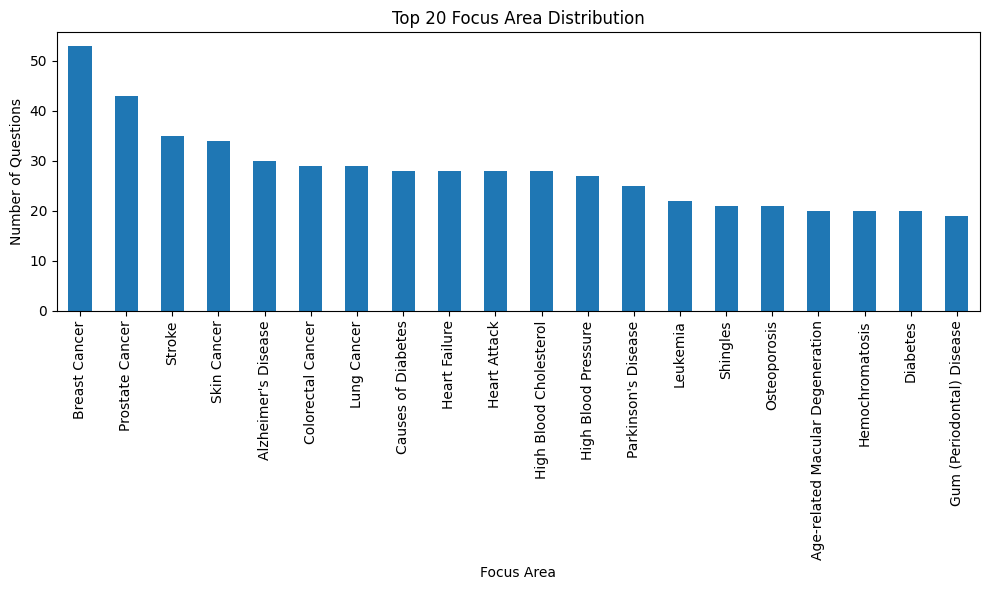

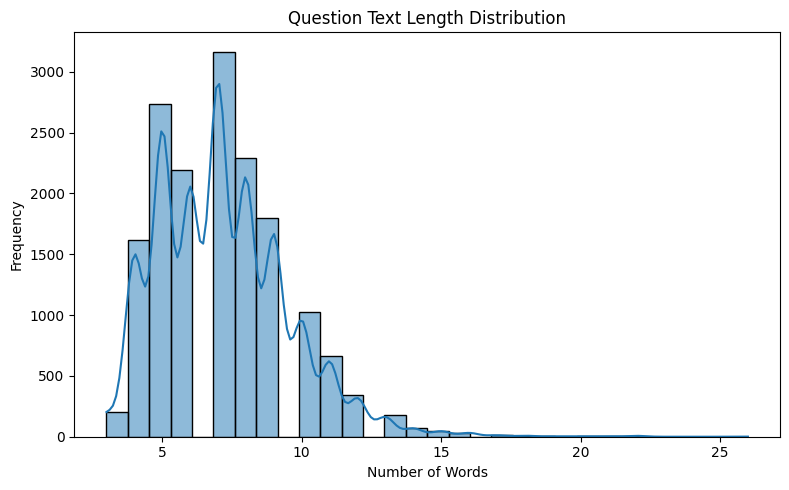

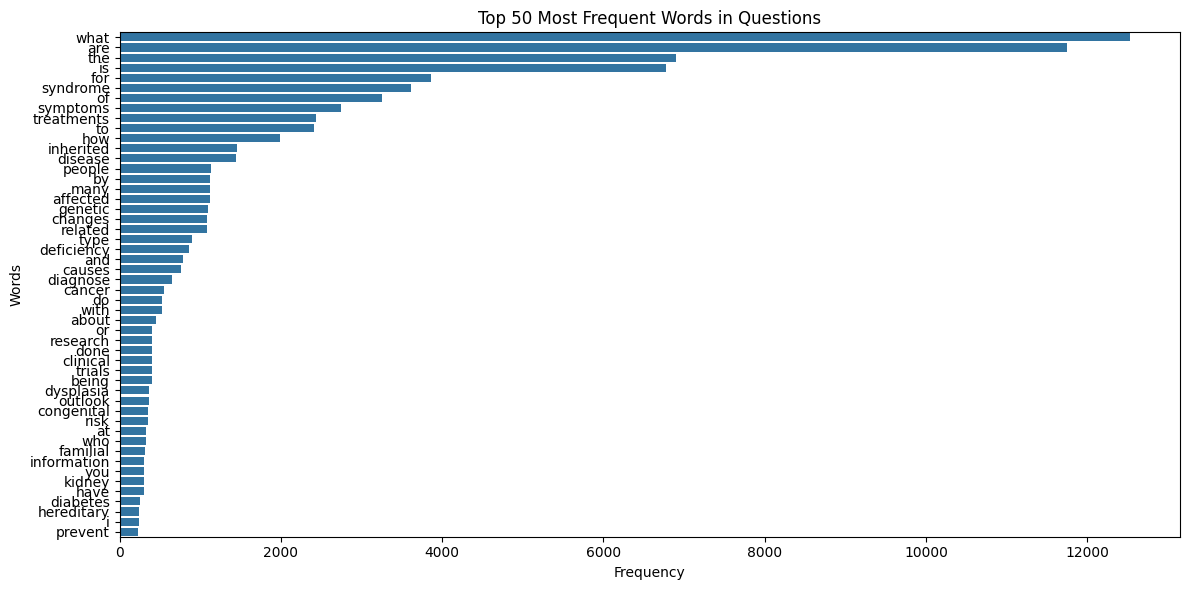

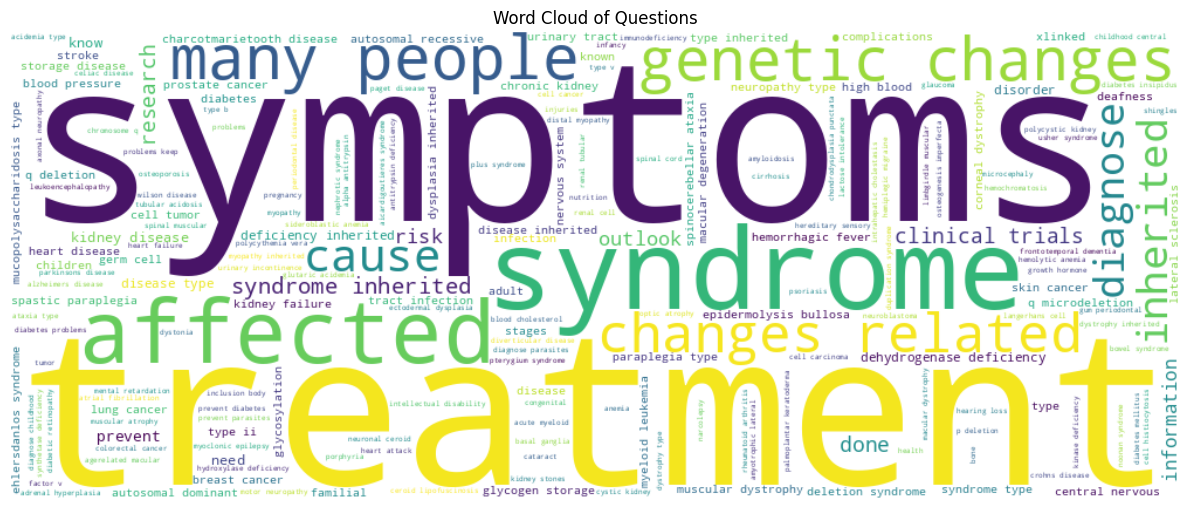

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter

# Load the dataset - Changed from "medquad.csv" to "medquad.csv.zip"
df = pd.read_csv("medquad.csv.zip")

# Clean text
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', str(text))
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()

df['cleaned_question'] = df['question'].apply(clean_text)

# Text length distribution
df['text_length'] = df['cleaned_question'].apply(lambda x: len(x.split()))

# Plot 1: Category distribution
plt.figure(figsize=(10, 6))
df['focus_area'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Focus Area Distribution")
plt.xlabel("Focus Area")
plt.ylabel("Number of Questions")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("focus_area_distribution.png")
plt.show()

# Plot 2: Text length distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Question Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("text_length_distribution.png")
plt.show()

# Plot 3: Word frequency (top 50)
all_words = ' '.join(df['cleaned_question']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(50)
words, counts = zip(*common_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 50 Most Frequent Words in Questions")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.savefig("word_frequency_barplot.png")
plt.show()

# Plot 4: Word cloud
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Questions")
plt.tight_layout()
plt.savefig("wordcloud_questions.png")
plt.show()

FEATURE ENGINEERING

In [ ]:
pip install transformers torch scikit-learn matplotlib pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


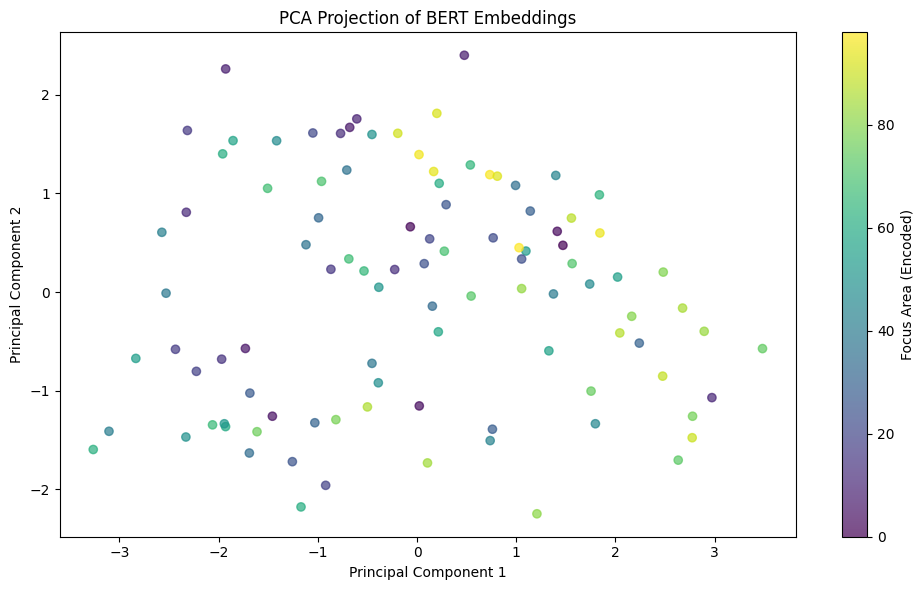

In [ ]:
# Step 1: Clean the text
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel
import torch

def clean_text(text):
    text = re.sub(r'<[^>]+>', '', str(text))        # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)           # Remove non-alphabetic characters
    return text.lower()

# Ensure df is loaded before applying clean_text
# If running this cell independently, make sure df is already in your environment
# Otherwise, load it here:
df = pd.read_csv("medquad.csv.zip")

df['cleaned_question'] = df['question'].apply(clean_text)

# Step 2: Load pre-trained BERT model and tokenizer
model_name = "distilbert-base-uncased"   # A lightweight BERT model
tokenizer = AutoTokenizer.from_pretrained(model_name)
# The error occurred here, after restarting the runtime and reinstalling packages,
# this line should now execute without the RuntimeError.
model = AutoModel.from_pretrained(model_name)

# Function to compute BERT embedding using mean pooling
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128, padding="max_length")
    with torch.no_grad():
        outputs = model(**inputs)
    last_hidden_state = outputs.last_hidden_state
    # Mean pooling
    attention_mask = inputs['attention_mask']
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(last_hidden_state.size()).float()
    sum_embeddings = torch.sum(last_hidden_state * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    embedding = sum_embeddings / sum_mask
    return embedding.squeeze().numpy()

# For performance, process a sample subset (adjust n as needed)
sample_df = df.sample(n=100, random_state=42).reset_index(drop=True)
embeddings = []
for i, row in sample_df.iterrows():
    emb = get_bert_embedding(row['cleaned_question'])
    embeddings.append(emb)

X = np.vstack(embeddings)

# Encode target variable
label_encoder = LabelEncoder()
sample_df['encoded_label'] = label_encoder.fit_transform(sample_df['focus_area'])

# Step 3: Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 4: Visualize the 2D PCA projection of BERT embeddings
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sample_df['encoded_label'], cmap='viridis', alpha=0.7)
plt.title("PCA Projection of BERT Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Focus Area (Encoded)")
plt.tight_layout()
plt.savefig("bert_pca_visualization.png")
plt.show()

MODEL BUILDING

In [ ]:
df['focus_area'].value_counts()


,count
focus_area,
Breast Cancer,53
Prostate Cancer,43
Stroke,35
Skin Cancer,34
Alzheimer's Disease,30
...,...
T-cell lymphoma 1A,1
Chancroid,1
GOSR2-related progressive myoclonus ataxia,1


In [ ]:
df_filtered = df.groupby('focus_area').filter(lambda x: len(x) > 1)


In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_filtered, test_size=0.2, random_state=42, stratify=df_filtered['focus_area'])


In [ ]:
pip install pandas scikit-learn sentence-transformers


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the dataset
df = pd.read_csv("medquad.csv.zip")

# Drop missing values
df.dropna(subset=['question', 'answer', 'focus_area'], inplace=True)

# Filter out rare classes
df = df.groupby('focus_area').filter(lambda x: len(x) > 1)

# Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['focus_area'])

# -------------------------------
# Model 1: Logistic Regression + TF-IDF
# -------------------------------

# Pipeline for TF-IDF + Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])

pipeline.fit(train_df['question'], train_df['focus_area'])
preds = pipeline.predict(test_df['question'])

# Evaluation
print("Model 1: Logistic Regression with TF-IDF")
print("Accuracy:", accuracy_score(test_df['focus_area'], preds))
print(classification_report(test_df['focus_area'], preds))

# -------------------------------
# Model 2: BERT Embeddings + Cosine Similarity (Retrieval)
# -------------------------------

# Load BERT model for sentence embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode training questions and answers
train_q_embeddings = model.encode(train_df['question'].tolist(), convert_to_tensor=True)
train_a_embeddings = model.encode(train_df['answer'].tolist(), convert_to_tensor=True)

# Encode test questions
test_q_embeddings = model.encode(test_df['question'].tolist(), convert_to_tensor=True)

# Retrieval: cosine similarity
top_1_correct = 0
for i, test_vec in enumerate(test_q_embeddings):
    cos_sim = cosine_similarity([test_vec], train_q_embeddings)[0]
    top_index = np.argmax(cos_sim)
    retrieved_answer = train_df.iloc[top_index]['answer']
    if test_df.iloc[i]['answer'].strip() == retrieved_answer.strip():
        top_1_correct += 1

# Accuracy for retrieval
accuracy_bert = top_1_correct / len(test_df)
print("\nModel 2: BERT-based Retrieval")
print("Top-1 Accuracy:", round(accuracy_bert * 100, 2), "%")


Model 1: Logistic Regression with TF-IDF
Accuracy: 0.7543547813722005


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

                                                                                                                                          precision    recall  f1-score   support

                                                                                                          11-beta-hydroxylase deficiency       0.00      0.00      0.00         1
                                                                                                                   15q11.2 microdeletion       0.00      0.00      0.00         1
                                                                                                                   15q13.3 microdeletion       0.50      1.00      0.67         1
                                                                                                          15q13.3 microdeletion syndrome       0.00      0.00      0.00         1
                                                                                                             

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Model 2: BERT-based Retrieval
Top-1 Accuracy: 0.78 %


MODEL EVALUATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv("medquad.csv.zip").dropna(subset=['question', 'answer', 'focus_area'])
df = df.groupby('focus_area').filter(lambda x: len(x) > 1)

# Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['focus_area'])

# -------------------------------
# Model 1: Logistic Regression + TF-IDF
# -------------------------------

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])

pipeline.fit(train_df['question'], train_df['focus_area'])
preds = pipeline.predict(test_df['question'])

# Evaluation
print("Model 1: Logistic Regression with TF-IDF")
print("Accuracy:", accuracy_score(test_df['focus_area'], preds))
print(classification_report(test_df['focus_area'], preds))

# Confusion Matrix
cm = confusion_matrix(test_df['focus_area'], preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, xticklabels=np.unique(df['focus_area']),
            yticklabels=np.unique(df['focus_area']),
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: TF-IDF + Logistic Regression")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# ROC Curve for top 5 classes
y_test_bin = label_binarize(test_df['focus_area'], classes=np.unique(df['focus_area']))
y_pred_prob = pipeline.predict_proba(test_df['question'])
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(min(5, y_test_bin.shape[1])):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(min(5, y_test_bin.shape[1])):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} AUC = {roc_auc[i]:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve: Top 5 Classes (LogReg)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# -------------------------------
# Model 2: BERT Sentence Embedding + Cosine Similarity
# -------------------------------

model = SentenceTransformer('all-MiniLM-L6-v2')
train_embeddings = model.encode(train_df['question'].tolist(), convert_to_tensor=False)
test_embeddings = model.encode(test_df['question'].tolist(), convert_to_tensor=False)

top1_correct = 0
for i, test_vec in enumerate(test_embeddings):
    sims = cosine_similarity([test_vec], train_embeddings)[0]
    top_idx = np.argmax(sims)
    if test_df.iloc[i]['focus_area'] == train_df.iloc[top_idx]['focus_area']:
        top1_correct += 1

bert_acc = top1_correct / len(test_df)
print(f"\nModel 2: BERT Embedding Retrieval")
print(f"Top-1 Accuracy: {bert_acc:.2%}")

# -------------------------------
# Summary
# -------------------------------
print("\nModel Comparison Summary:")
print(f"TF-IDF + Logistic Regression Accuracy: {accuracy_score(test_df['focus_area'], preds):.2%}")
print(f"BERT Retrieval Top-1 Accuracy: {bert_acc:.2%}")


Model 1: Logistic Regression with TF-IDF
Accuracy: 0.7543547813722005
                                                                                                                                          precision    recall  f1-score   support

                                                                                                          11-beta-hydroxylase deficiency       0.00      0.00      0.00         1
                                                                                                                   15q11.2 microdeletion       0.00      0.00      0.00         1
                                                                                                                   15q13.3 microdeletion       0.50      1.00      0.67         1
                                                                                                          15q13.3 microdeletion syndrome       0.00      0.00      0.00         1
                                       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

DEPLOYMENT

In [ ]:
# Install streamlit
!pip install streamlit

# Continue with the rest of your code
import streamlit as st
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
import os

# Unzip the uploaded dataset
with zipfile.ZipFile("medquad.csv.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

# Load the dataset
df = pd.read_csv("medquad.csv")
df = df.dropna(subset=['question', 'answer'])

# TF-IDF setup
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['question'])

# Streamlit UI
st.title("Deployed Chatbot")
st.write("Ask a medical question:")

user_input = st.text_input("Your question here:")

if st.button("Ask"):
    if user_input:
        user_tfidf = vectorizer.transform([user_input])
        similarity_scores = cosine_similarity(user_tfidf, tfidf_matrix)
        best_match_idx = similarity_scores.argmax()
        best_question = df.iloc[best_match_idx]['question']
        best_answer = df.iloc[best_match_idx]['answer']

        st.subheader("Chatbot Response:")
        st.write(best_answer)

        st.markdown("---")
        st.markdown("*Matched Question:* " + best_question)
    else:
        st.warning("Please enter a question to get a response.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


2025-05-17 11:19:25.093 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 11:19:25.270 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-17 11:19:25.271 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 11:19:25.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 11:19:25.276 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 11:19:25.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 11:19:25.279 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 11:19:25.280 Thread 'MainThread': mi